In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import random
import re
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_labels = pd.read_csv("test_labels.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [3]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [6]:
sample_submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [7]:
print(train.describe())
print("=============================================================================")
print(test.describe())
print("=============================================================================")
print(test_labels.describe())
print("=============================================================================")
print(sample_submission.describe())

               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       0.009996       0.052948       0.002996   
std         0.294379       0.099477       0.223931       0.054650   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              insult  identity_hate  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000  
                      id            

In [8]:
print(train.info())
print("=============================================================================")
print(test.info())
print("=============================================================================")
print(test_labels.info())
print("=============================================================================")
print(sample_submission.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 7 columns):
id               153164 non-null object
toxic            153164 non-null int64
severe_toxic     153164 non-null int64
obscene          153164 non-null int64
threat           1531

In [44]:
toxicness = ["toxic" , "severe_toxic" ,"obscene" , "threat" , "insult" , "identity_hate"]

for i in toxicness:
    print("train[",i,"] === ",train[i].unique())

print()
    
for i in toxicness:
    print("test_labels[",i,"] === ",test_labels[i].unique())
    
print()
    
for i in toxicness:
    print("sample_submission[",i,"] === ",sample_submission[i].unique())

train[ toxic ] ===  [0 1]
train[ severe_toxic ] ===  [0 1]
train[ obscene ] ===  [0 1]
train[ threat ] ===  [0 1]
train[ insult ] ===  [0 1]
train[ identity_hate ] ===  [0 1]

test_labels[ toxic ] ===  [-1  0  1]
test_labels[ severe_toxic ] ===  [-1  0  1]
test_labels[ obscene ] ===  [-1  0  1]
test_labels[ threat ] ===  [-1  0  1]
test_labels[ insult ] ===  [-1  0  1]
test_labels[ identity_hate ] ===  [-1  0  1]

sample_submission[ toxic ] ===  [0.5]
sample_submission[ severe_toxic ] ===  [0.5]
sample_submission[ obscene ] ===  [0.5]
sample_submission[ threat ] ===  [0.5]
sample_submission[ insult ] ===  [0.5]
sample_submission[ identity_hate ] ===  [0.5]


In [45]:
for i in toxicness:
    print("train[",i,"] === \n",train[i].value_counts(),"\n")

train[ toxic ] === 
 0    144277
1     15294
Name: toxic, dtype: int64 

train[ severe_toxic ] === 
 0    157976
1      1595
Name: severe_toxic, dtype: int64 

train[ obscene ] === 
 0    151122
1      8449
Name: obscene, dtype: int64 

train[ threat ] === 
 0    159093
1       478
Name: threat, dtype: int64 

train[ insult ] === 
 0    151694
1      7877
Name: insult, dtype: int64 

train[ identity_hate ] === 
 0    158166
1      1405
Name: identity_hate, dtype: int64 



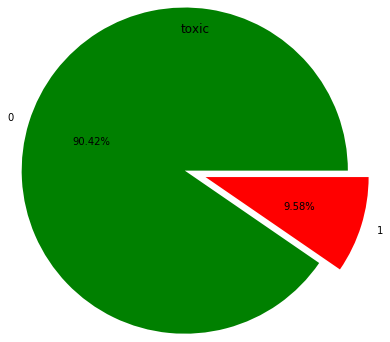

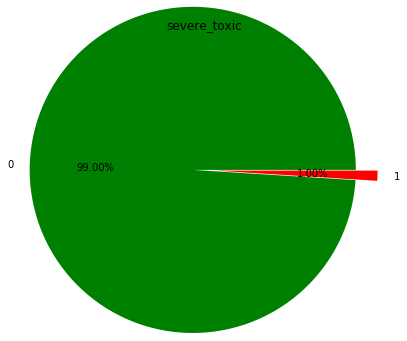

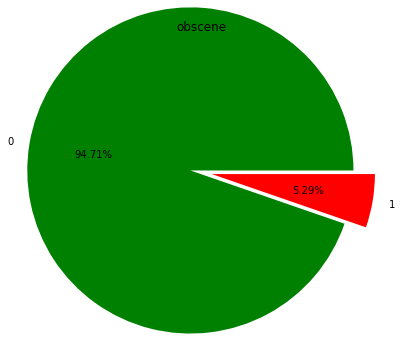

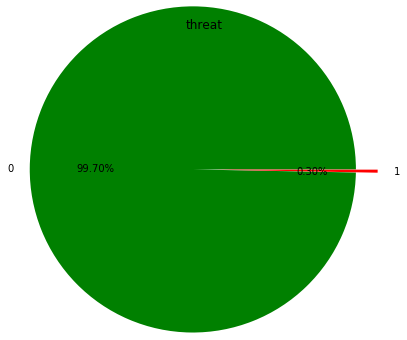

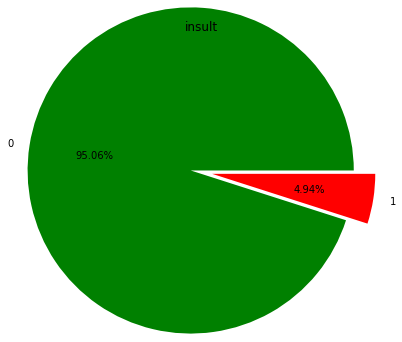

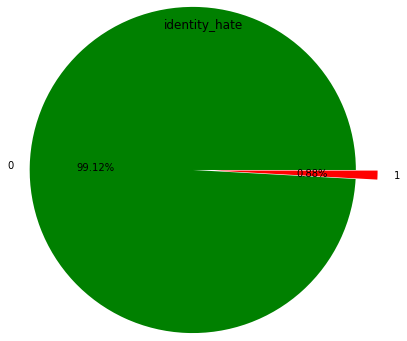

In [46]:
for i in toxicness:
    plt.axis("equal")
    data=[train[i].value_counts()[0],train[i].value_counts()[1]]
    label = ["0","1"]
    plt.pie(data,labels =label,radius=1.5,explode=[0.1,0.1],autopct="%0.2f%%",colors = ['G' , 'R'])
    plt.plot()
    plt.title(i)
    fig=plt.gcf()
    fig.set_size_inches(5,5)
    plt.show()

In [12]:
# i = 0
# for i in range(train.shape[0]):
#     if(train.insult[i]==0 & train.severe_toxic[i]==0 & train.obscene[i]==0 & train.threat[i]==0 & train.toxic[i]==0):
#         train['clean'] = 1
#     else:
#         train['clean'] = 0
        
#     if(i%5000 == 0):
#         print(i)

In [13]:
# safe_txt = pd.DataFrame({"text":train["comment_text"],"safe":train["clean"]})

# safe_txt.to_csv("safe_txt.csv" , index = False)

In [14]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stopword = set(stopwords.words("english"))

def word_duniya(text_data,toxicness):
    for i,val in enumerate(text_data.comment_text):
        text = val.lower()
        
        words = word_tokenize(text)
        
        for word in words:
            if word not in stopword:
                word = ps.stem(word)
                toxicness = toxicness + word + ' '
        
        if i%300==0:
            print(i)
            
    return toxicness

# Safe

In [15]:
# safe_0_words = ''
# safe_1_words = ''

# safe_0 = train[train.clean == 0]
# safe_1 = train[train.clean == 1]


In [16]:
# word_duniya(safe_0,safe_0_words)
# word_duniya(safe_1,safe_1_words)

In [17]:
# safe_0_wordcloud = WordCloud(width=400 , height=400).generate(safe_0_words)
# safe_1_wordcloud = WordCloud(width=400 , height=400).generate(safe_1_words)

In [18]:
# plt.subplot(2,1,1)
# plt.imshow(safe_0_wordcloud)

# plt.subplot(2,1,2)
# plt.imshow(safe_1_wordcloud)

# plt.show()

# Toxic

In [19]:


toxic_1_words = ''
toxic_1 = train[train.toxic == 1]


In [20]:
toxic_1_words = word_duniya(toxic_1,toxic_1_words)

0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
9900
10200
10500
10800
11100
11400
11700
12000
12300
12600
12900
13200
13500
13800
14100
14400
14700
15000


In [21]:
len(toxic_1_words)

3101293

In [22]:
toxic_1_wordcloud = WordCloud(width=1000 , height=1000).generate(toxic_1_words)

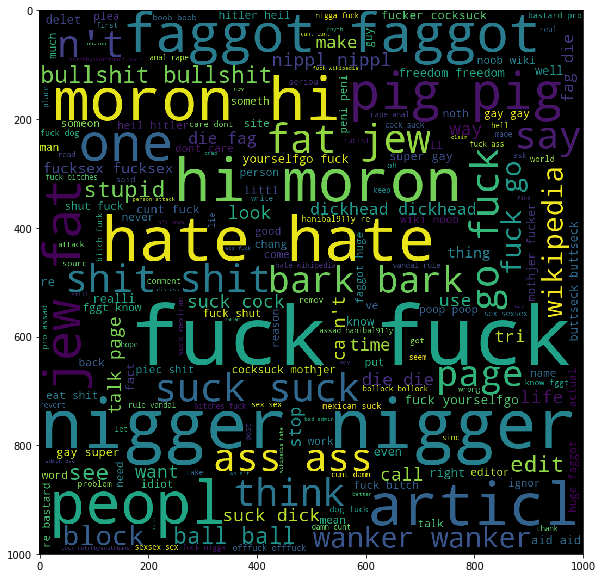

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(toxic_1_wordcloud)
plt.show()


# Severe Toxic

In [24]:

severe_toxic_1_words = ''
severe_toxic_1 = train[train.severe_toxic == 1]


In [25]:
severe_toxic_1_words = word_duniya(severe_toxic_1,severe_toxic_1_words)

0
300
600
900
1200
1500


In [26]:
len(severe_toxic_1_words)

558317

In [27]:
severe_toxic_1_wordcloud = WordCloud(width=1000 , height=1000).generate(severe_toxic_1_words)

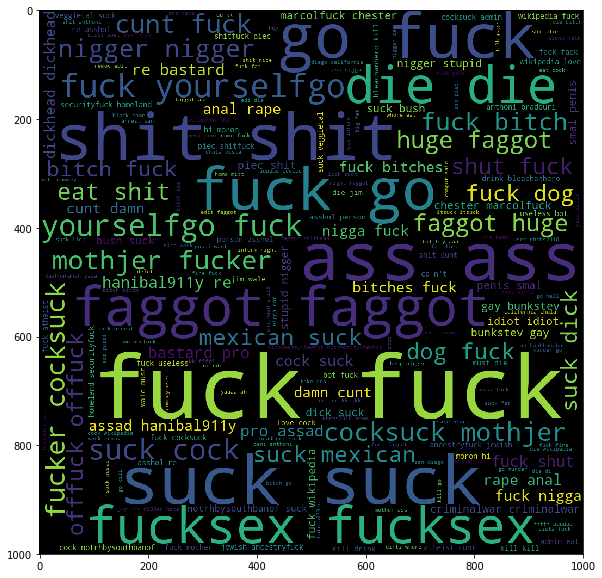

In [28]:
plt.figure(figsize=(10,10))
plt.imshow(severe_toxic_1_wordcloud)
plt.show()


# Obscene

In [29]:

obscene_1_words = ''
obscene_1 = train[train.obscene == 1]


In [30]:
obscene_1_words = word_duniya(obscene_1,obscene_1_words)

0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400


In [31]:
len(obscene_1_words)

1686513

In [32]:
obscene_1_wordcloud = WordCloud(width=1000 , height=1000).generate(obscene_1_words)

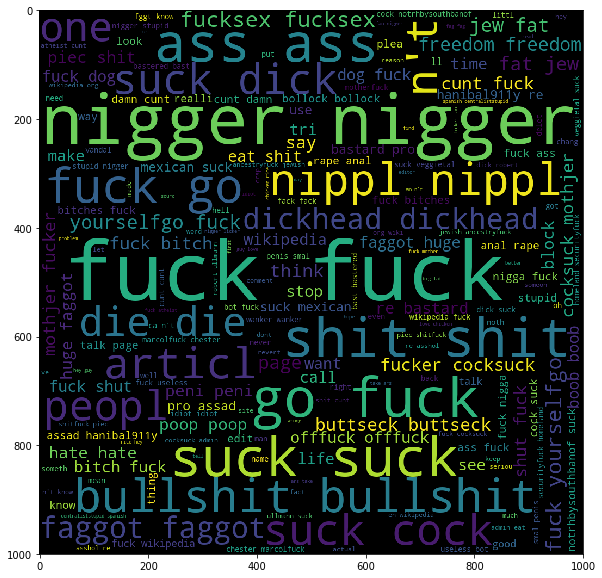

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(obscene_1_wordcloud)
plt.show()


# Threat

In [34]:

threat_1_words = ''
threat_1 = train[train.threat == 1]


In [35]:
threat_1_words = word_duniya(threat_1,threat_1_words)

0
300


In [36]:
len(threat_1_words)

106545

In [37]:
threat_1_wordcloud = WordCloud(width=1000 , height=1000).generate(threat_1_words)

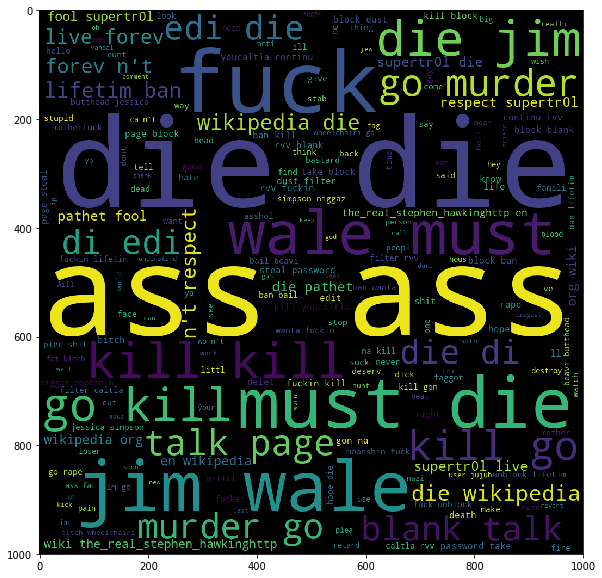

In [38]:
plt.figure(figsize=(10,10))
plt.imshow(threat_1_wordcloud)
plt.show()


# Insult

In [39]:

insult_1_words = ''
insult_1 = train[train.insult == 1]


In [40]:
insult_1_words = word_duniya(insult_1,insult_1_words)

0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800


In [41]:
len(insult_1_words)

1516116

In [42]:
insult_1_wordcloud = WordCloud(width=1000 , height=1000).generate(insult_1_words)

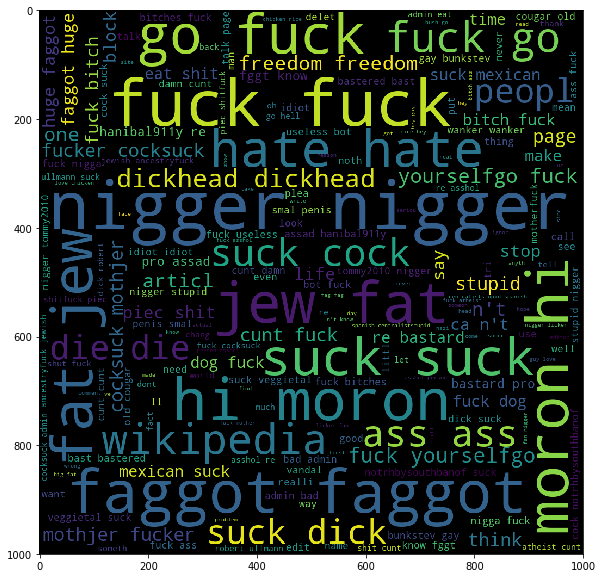

In [43]:
plt.figure(figsize=(10,10))
plt.imshow(insult_1_wordcloud)
plt.show()


# Identity Hate

In [47]:
identity_hate_1_words = ''
identity_hate_1 = train[train.identity_hate == 1]

In [48]:
identity_hate_1_words = word_duniya(identity_hate_1,identity_hate_1_words)

0
300
600
900
1200


In [49]:
len(identity_hate_1_words)

320747

In [50]:
identity_hate_1_wordcloud = WordCloud(width=1000 , height=1000).generate(identity_hate_1_words)

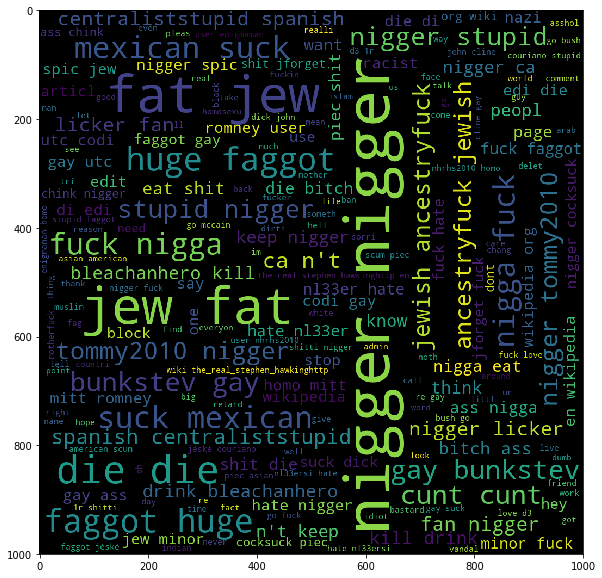

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(identity_hate_1_wordcloud)
plt.show()